Try to use image processing algorithm to get the better estimation of xy to click

In [21]:
import requests
from math import sqrt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square,erosion,watershed
from skimage.color import label2rgb
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


In [29]:
plt.rcParams["figure.figsize"] = (10,20)

In [22]:
wms_url = 'http://globalfloods-ows.ecmwf.int/glofas-ows/ows.py?'
wms_paras = {
    'SERVICE':'WMS',
    'REQUEST':'GetFeatureInfo',
    'FORMAT':'image/png',
    'VERSION':'1.3.0',
    'LAYERS':'RPG_U',
    'WIDTH':1020,
    'HEIGHT':678,
    'CRS':'EPSG:3857',
    'BBOX':'-13094904.603227489,2941622.234325256,-8105095.39677251,6258377.765674742',
    'INFO_FORMAT':'text/html',
    'QUERY_LAYERS':'RPG_U',
    'TRANSPARENT':True,
    'TIME':None,
    'I':456,
    'J':227
}
wms_paras['REQUEST']='GetMap'
# wms_paras['CRS']='EPSG:4326'
# wms_paras['BBOX'] = "-27,23,-2,42"
# resp = requests.get(wms_url, params=wms_paras)
# print(resp.url)
# Image(resp.content)
# test EPSG:3857
wms_paras['CRS']='EPSG:3857'
wms_paras['BBOX'] = '2560348.29,-3123471.75,4675418.61,-222684.21'
wms_paras['WIDTH']=600*2
wms_paras['HEIGHT']=800*2
resp = requests.get(wms_url, params=wms_paras)
print(resp.url)

http://globalfloods-ows.ecmwf.int/glofas-ows/ows.py?SERVICE=WMS&REQUEST=GetMap&FORMAT=image%2Fpng&VERSION=1.3.0&LAYERS=RPG_U&WIDTH=1200&HEIGHT=1600&CRS=EPSG%3A3857&BBOX=2560348.29%2C-3123471.75%2C4675418.61%2C-222684.21&INFO_FORMAT=text%2Fhtml&QUERY_LAYERS=RPG_U&TRANSPARENT=True&I=456&J=227


In [23]:
image_org=plt.imread(resp.url)

In [24]:
image_gray = rgb2gray(image_org)

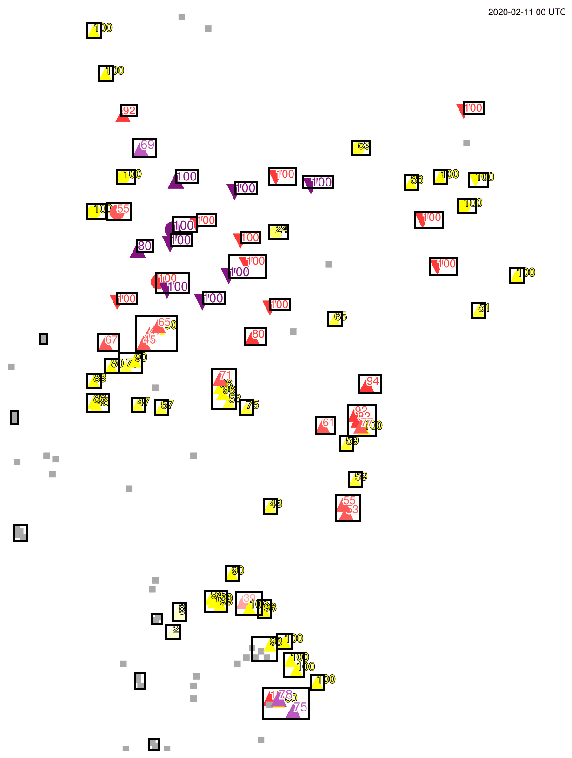

In [36]:
image=image_gray
thresh = threshold_otsu(image)
bw = closing(image > thresh , square(2))


# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots()
#ax.imshow(image_label_overlay)
ax.imshow(image_org)
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 300:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        #print(region.bbox)
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='black', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
#plt.tight_layout()
plt.show()